In [49]:
%matplotlib inline
import math
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

VenFile = "/home/hirak/Ven.txt"
mapperAccuracyFile = "mapperAccuracy.txt"
kmerAccuracyPrefix = "kmerAccuracy"
timeMapperFile = "timerMapper.txt"
timeIndexFile= "./dummy_reads/timeMapIndex.txt"
kmerSize = [21, 25, 27, 31]

###Read Accuracy into a dictionary

In [2]:
def readValue(fileName, flag = ''):
    mapValueDict = {}
    with open(fileName, 'r') as fileHandle:
        for line in fileHandle:
            #get name of mapper
            if flag == 'kmerFile':
                mapperName = len(mapValueDict)+1
            else:
                mapperName = line.strip().split("/")[-1].replace('.sam','')   

            #use temporary dictionary
            valueDict = {}

            #get total no. of reads
            line = fileHandle.next().strip()
            valueDict['reads'] = int(line.split("=")[-1])

            #get # of reads Aligned
            line = fileHandle.next().strip()
            valueDict['align'] = int(line.split("=")[-1])

            #get # of True positive
            line = fileHandle.next().strip()
            valueDict['tp'] = int(line.split("=")[-1])

            #get # of False positive
            line = fileHandle.next().strip()
            valueDict['fp'] = int(line.split("=")[-1])

            #get # of False negative
            line = fileHandle.next().strip()
            valueDict['fn'] = int(line.split("=")[-1])

            #get precision
            line = fileHandle.next().strip()
            valueDict['pre'] = float(line.split("=")[-1].replace('%',''))

            #get recall
            line = fileHandle.next().strip()
            valueDict['recall'] = float(line.split("=")[-1].replace('%',''))

            #ignore true positve % since same as precision
            line = fileHandle.next().strip()

            #get FDR %
            line = fileHandle.next().strip()
            valueDict['fdr'] = float(line.split("=")[-1].replace('%',''))

            #get f1 %
            line = fileHandle.next().strip()
            valueDict['f1'] = float(line.split("=")[-1].replace('%',''))

            #get avg hits per read

            line = fileHandle.next().strip()
            valueDict['hpr'] = float(line.split("=")[-1].replace('%',''))

            mapValueDict[mapperName] = valueDict

        return mapValueDict

In [27]:
df = pd.read_table(VenFile,index_col=0,header=None,names=["QuasiNew","QuasiOld","kallisto","Star","B2"],skiprows=1)

In [34]:
s = df['QuasiNew'][4]

In [37]:
s.strip('%')

'97.18'

In [38]:
for i in range(0,len(df)):
    s= df['QuasiNew'][i]
    if(s[-1] != '%'):
        df['QuasiNew'][i] = float(df['QuasiNew'][i])
    else:
        df['QuasiNew'][i] = float(s.strip('%'))
        
    s= df['QuasiOld'][i]
    if(s[-1] != '%'):
        df['QuasiOld'][i] = float(df['QuasiOld'][i])
    else:
        df['kallisto'][i] = float(s.strip('%'))
        
    if(s[-1] != '%'):
        df['kallisto'][i] = float(df['kallisto'][i])
    else:
        df['kallisto'][i] = float(s.strip('%'))
        
    if(s[-1] != '%'):
        df['Star'][i] = float(df['Star'][i])
    else:
        df['Star'][i] = float(s.strip('%'))
        
    if(s[-1] != '%'):
        df['B2'][i] = float(df['B2'][i])
    else:
        df['B2'][i] = float(s.strip('%'))

In [39]:
df

,QuasiNew,QuasiOld,kallisto,Star,B2
Reads Aligned,8.74627e+06,8.95219e+06,8.37543e+06,8.33295e+06,8.94063e+06
True Pos,8.49926e+06,8.64669e+06,8.05644e+06,8.00269e+06,8.64226e+06
False Pos,247003,305495,318992,330261,298363
False Neg,1.25373e+06,1.04781e+06,1.62457e+06,1.66705e+06,1.05937e+06
Precision,97.18,96.59%,96.59,96.59,96.59
Recall,87.15,89.19%,89.19,89.19,89.19
FDR,2.82,3.41%,3.41,3.41,3.41
F1 Score,91.89,92.74%,92.74,92.74,92.74
Noise cases,131419,174096,130253,84001,166665


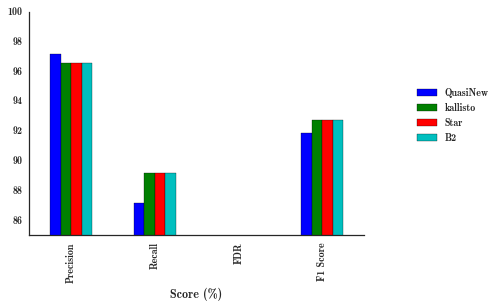

In [70]:
sns.set_style("white")
df.loc[['Precision','Recall','FDR','F1 Score']].plot(kind='bar', grid=False).legend(bbox_to_anchor=(1.4, 0.7))
plt.ylim(85,100)
#ax1.set_ylim([0, 10])
#ax2.set_ylim([90, 100])
sns.despine()
plt.xlabel('Score (%)', fontsize='large')
plt.savefig('/home/hirak/mapping_scorebenchmark.pdf',bbox_inches='tight', pad_inches=0)

###Mapper-Accuracy plot

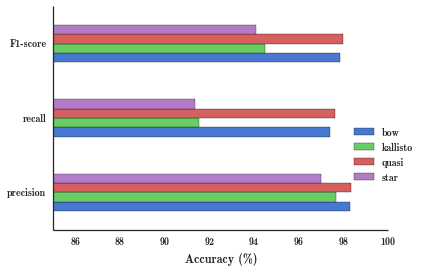

In [178]:
sns.set_style("white")

mapValueDict = readValue(mapperAccuracyFile)
mvd = pd.DataFrame(mapValueDict)

mvd.loc['precision'] = mvd.loc['pre']
mvd.loc['F1-score'] = mvd.loc['f1']
mvd.loc['FDR'] = mvd.loc['fdr']
mvd.loc['hits per read'] = mvd.loc['hpr']

mvd.loc[['precision', 'recall', 'F1-score']].plot(kind='barh', grid=False).legend(bbox_to_anchor=(1.1, 0.5))
plt.xlim(85,100)
sns.despine()
plt.xlabel('Accuracy (%)', fontsize='large')
plt.savefig('./dummy_reads/mapping_scorebenchmark.pdf',bbox_inches='tight', pad_inches=0)

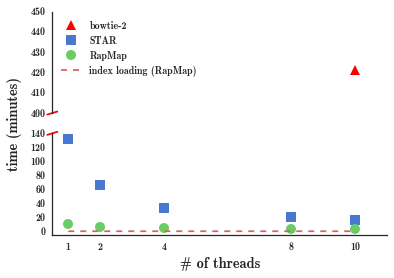

In [74]:
def addBreakClips(ax1,ax2):
    """ Code to add diagonal slashes to truncated y-axes.
    copied from http://matplotlib.org/examples/pylab_examples/broken_axis.html"""
    
    d = .015 # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax1.transAxes, color='r', clip_on=False)
    ax1.plot((-d,+d),(-d,+d), **kwargs)      # top-left diagonal
    #ax1.plot((1-d,1+d),(-d,+d), **kwargs)    # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d,+d),(1-d,1+d), **kwargs)   # bottom-left diagonal
    #ax2.plot((1-d,1+d),(1-d,1+d), **kwargs) # bottom-right diagonal


#Time/Thread Graph
sns.set_style("white")
threads = [1, 2, 4, 8, 10]

#axes = plt.gca()
fig,(ax2,ax1) = plt.subplots(2, 1, sharex=True)
ax1.set_xlim([0.5, 11])
ax1.set_ylim([-5, 140])
ax2.set_ylim([400, 450])
plt.ylabel('time (minutes)', fontsize= 'x-large' )
plt.xlabel('# of threads', fontsize= 'x-large' )

timeDict = {'star_8': '20.26', 'quasi_10': '2.59', 'bowtie2_10': '421.02', 'star_2': '66.10', 'star_1': '132.20', 'star_4': '33.32', 'quasi_8': '3.40', 'star_10': '16.77', 'quasi_1': '10.37', 'quasi_2': '6.27', 'quasi_4': '4.39'}
timeIndDict = {'quasiload_1': '0.11', 'quasiload_8': '0.10', 'quasiload_2': '0.10', 'quasiload_10': '0.10', 'quasiload_4': '0.10'}

quasiVal = [timeDict['quasi_1'], timeDict['quasi_2'], timeDict['quasi_4'], timeDict['quasi_8'], timeDict['quasi_10']]
quasiLoad = [timeIndDict['quasiload_1'], timeIndDict['quasiload_2'], timeIndDict['quasiload_4'], timeIndDict['quasiload_8'], timeIndDict['quasiload_10']]
starVal = [timeDict['star_1'], timeDict['star_2'], timeDict['star_4'], timeDict['star_8'], timeDict['star_10']]

sns.set_palette('muted')


ms = 10
bow, = ax2.plot(threads[-1], timeDict['bowtie2_10'], 'r^', markersize=ms)
STAR, = ax1.plot(threads, starVal, 's', markersize=ms)
quasi = ax1.plot(threads, quasiVal, 'o', markersize=ms)
quasiload = ax1.plot(threads, quasiLoad, '--', markersize=ms)
plt.xticks(threads, threads)
sns.despine()
ax2.spines['bottom'].set_visible(False)
addBreakClips(ax2, ax1)

x0, y0 = ax1.yaxis.label.get_position()
ax1.yaxis.set_label_coords(x0-0.09, y0+0.6)

ax2.legend([bow, STAR, quasi[0], quasiload[0]], ["bowtie-2", "STAR", "RapMap", "index loading (RapMap)"], loc = 2)
plt.savefig('./dummy_reads/timeBench.pdf',bbox_inches='tight', pad_inches=0)
plt.show()

In [179]:
mvd

,bow,kallisto,quasi,star
align,47579567.00,44774502.00,47677356.00,44711604.00
f1,97.86,94.50,97.98,94.10
fdr,1.69,2.33,1.65,2.98
fn,1241778.00,4046843.00,1143989.00,4109741.00
fp,805965.00,1042167.00,785845.00,1330181.00
hpr,0.00,5.30,4.30,3.80
pre,98.31,97.67,98.35,97.02
reads,48821345.00,48821345.00,48821345.00,48821345.00
recall,97.41,91.53,97.62,91.35
tp,46773603.00,43732336.00,46891512.00,43381424.00


In [180]:
fp = open('./dummy_reads/score_table.tex','w')
fp.write(str(mvd.to_latex()))

In [181]:
mvd2 = mvd.drop(['f1','fdr','pre','reads', 'hpr', 'tp', 'fp', 'fn'])
print (mvd2.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &          bow &     kallisto &        quasi &         star \\
\midrule
align         &  47579567.00 &  44774502.00 &  47677356.00 &  44711604.00 \\
recall        &        97.41 &        91.53 &        97.62 &        91.35 \\
precision     &        98.31 &        97.67 &        98.35 &        97.02 \\
F1-score      &        97.86 &        94.50 &        97.98 &        94.10 \\
FDR           &         1.69 &         2.33 &         1.65 &         2.98 \\
hits per read &         0.00 &         5.30 &         4.30 &         3.80 \\
\bottomrule
\end{tabular}



###kmer-Accuracy plot

#F1-score

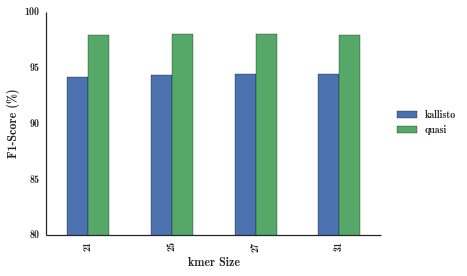

In [52]:
sns.set_style("white")

kmerValueDict = {}
for kmer in kmerSize:
    kmerValueDict[kmer] = readValue(kmerAccuracyPrefix+str(kmer)+".txt", 'kmerFile')

plotDict = {'quasi' : {}, 'kallisto' : {}}
kmer = []

for kmer in kmerSize:
    for id in [1, 2]:
        if id == 1:
            plotDict['quasi'][kmer] = kmerValueDict[kmer][id]['f1']
        else:
            plotDict['kallisto'][kmer] =  kmerValueDict[kmer][id]['f1']
       
mvd = pd.DataFrame(plotDict)
mvd.loc[[21, 25, 27, 31]].plot(kind='bar', grid=False).legend(bbox_to_anchor=(1.25, 0.6))
plt.ylim(80,100)
sns.despine()
plt.xlabel('kmer Size', fontsize='large')
plt.ylabel('F1-Score (%)', fontsize='large')
plt.savefig('./dummy_reads/f1.pdf',bbox_inches='tight', pad_inches=0)

In [15]:
mvd

,kallisto,quasi
21,94.20,97.99
25,94.36,98.02
27,94.42,98.02
31,94.50,97.98


#hits/read

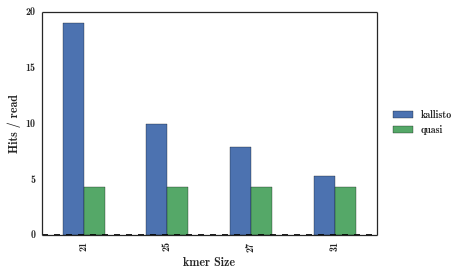

In [53]:
sns.set_style("white")

kmerValueDict = {}
for kmer in kmerSize:
    kmerValueDict[kmer] = readValue(kmerAccuracyPrefix+str(kmer)+".txt", 'kmerFile')

plotDict = {'quasi' : {}, 'kallisto' : {}}
kmer = []

for kmer in kmerSize:
    for id in [1, 2]:
        if id == 1:
            plotDict['quasi'][kmer] = kmerValueDict[kmer][id]['hpr']
        else:
            plotDict['kallisto'][kmer] =  kmerValueDict[kmer][id]['hpr']
       
mvd = pd.DataFrame(plotDict)
mvd.loc[[21, 25, 27, 31]].plot(kind='bar', grid=False).legend(bbox_to_anchor=(1.25, 0.6))
plt.xlabel('kmer Size', fontsize='large')
plt.ylabel('Hits / read', fontsize='large')
plt.savefig('./dummy_reads/heats_read.pdf',bbox_inches='tight', pad_inches=0)

#Recall

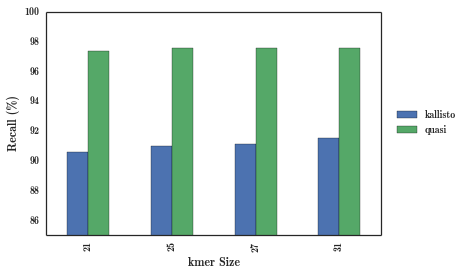

In [54]:
sns.set_style("white")

kmerValueDict = {}
for kmer in kmerSize:
    kmerValueDict[kmer] = readValue(kmerAccuracyPrefix+str(kmer)+".txt", 'kmerFile')

plotDict = {'quasi' : {}, 'kallisto' : {}}
kmer = []

for kmer in kmerSize:
    for id in [1, 2]:
        if id == 1:
            plotDict['quasi'][kmer] = kmerValueDict[kmer][id]['recall']
        else:
            plotDict['kallisto'][kmer] =  kmerValueDict[kmer][id]['recall']
       
mvd = pd.DataFrame(plotDict)
mvd.loc[[21, 25, 27, 31]].plot(kind='bar', grid=False).legend(bbox_to_anchor=(1.25, 0.6))
plt.ylim(85,100)
plt.xlabel('kmer Size', fontsize='large')
plt.ylabel('Recall (%)', fontsize='large')
plt.savefig('./dummy_reads/recall.pdf',bbox_inches='tight', pad_inches=0)

In [18]:
mvd

,kallisto,quasi
21,90.63,97.38
25,91.01,97.60
27,91.15,97.57
31,91.53,97.62


#Time-Mapper Plot

In [3]:
timeDict = {}
memDict = {}
timeIndDict = {}
from __future__ import print_function
with open(timeMapperFile, 'r') as fileHandle:
    for line in fileHandle:
        mapperName = line.strip().replace('_48M','')
        line = fileHandle.next().strip().split(',')
        if len(line[0].split(':')) == 2:
            timeDict[mapperName] = "{0:.2f}".format(float(line[0].split(':')[0]) + (float(line[0].split(':')[1]) / 60))
        elif len(line[0].split(':')) == 3:
            timeDict[mapperName] = "{0:.2f}".format(float(line[0].split(':')[0])*60 + (float(line[0].split(':')[1])) + (float(line[0].split(':')[1]) / 60))
        memDict[mapperName] = line[1]
with open(timeIndexFile, 'r') as fileHandle:
    for line in fileHandle:
        mapperName = line.strip().replace('_48M','load')
        line = fileHandle.next().strip().split(',')
        timeIndDict[mapperName] = "{0:.2f}".format(float(line[0].split(':')[0]) + (float(line[0].split(':')[1]) / 60))
print (timeDict)
print (memDict)
print (timeIndDict)

{'star_8': '20.26', 'quasi_10': '2.59', 'bowtie2_10': '421.02', 'star_2': '66.10', 'star_1': '132.20', 'star_4': '33.32', 'quasi_8': '3.40', 'star_10': '16.77', 'quasi_1': '10.37', 'quasi_2': '6.27', 'quasi_4': '4.39'}
{'star_8': ' 4708952', 'quasi_10': ' 5201588', 'bowtie2_10': ' 922404', 'star_2': ' 3773536', 'star_1': ' 3630760', 'star_4': ' 4086268', 'quasi_8': ' 5194372', 'star_10': ' 5023836', 'quasi_1': ' 5170608', 'quasi_2': ' 5173596', 'quasi_4': ' 5181304'}
{'quasiload_1': '0.11', 'quasiload_8': '0.10', 'quasiload_2': '0.10', 'quasiload_10': '0.10', 'quasiload_4': '0.10'}


In [4]:
def addBreakClips(ax1,ax2):
    """ Code to add diagonal slashes to truncated y-axes.
    copied from http://matplotlib.org/examples/pylab_examples/broken_axis.html"""
    
    d = .015 # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax1.transAxes, color='r', clip_on=False)
    ax1.plot((-d,+d),(-d,+d), **kwargs)      # top-left diagonal
    #ax1.plot((1-d,1+d),(-d,+d), **kwargs)    # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d,+d),(1-d,1+d), **kwargs)   # bottom-left diagonal
    #ax2.plot((1-d,1+d),(1-d,1+d), **kwargs) # bottom-right diagonal

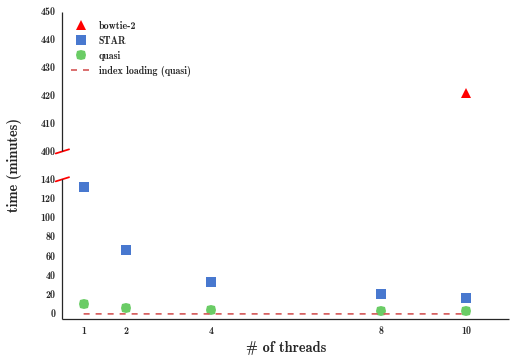

In [7]:
#Time/Thread Graph
sns.set_style("white")
threads = [1, 2, 4, 8, 10]

#axes = plt.gca()
fig,(ax2,ax1) = plt.subplots(2, 1, sharex=True)
ax1.set_xlim([0.5, 11])
ax1.set_ylim([-5, 140])
ax2.set_ylim([400, 450])
plt.ylabel('time (minutes)', fontsize= 'x-large' )
plt.xlabel('# of threads', fontsize= 'x-large' )

timeDict = {'star_8': '20.26', 'quasi_10': '2.59', 'bowtie2_10': '421.02', 'star_2': '66.10', 'star_1': '132.20', 'star_4': '33.32', 'quasi_8': '3.40', 'star_10': '16.77', 'quasi_1': '10.37', 'quasi_2': '6.27', 'quasi_4': '4.39'}
quasiVal = [timeDict['quasi_1'], timeDict['quasi_2'], timeDict['quasi_4'], timeDict['quasi_8'], timeDict['quasi_10']]
quasiLoad = [timeIndDict['quasiload_1'], timeIndDict['quasiload_2'], timeIndDict['quasiload_4'], timeIndDict['quasiload_8'], timeIndDict['quasiload_10']]
starVal = [timeDict['star_1'], timeDict['star_2'], timeDict['star_4'], timeDict['star_8'], timeDict['star_10']]

sns.set_palette('muted')


ms = 10
bow, = ax2.plot(threads[-1], timeDict['bowtie2_10'], 'r^', markersize=ms)
STAR, = ax1.plot(threads, starVal, 's', markersize=ms)
quasi = ax1.plot(threads, quasiVal, 'o', markersize=ms)
quasiload = ax1.plot(threads, quasiLoad, '--', markersize=ms)
plt.xticks(threads, threads)
sns.despine()
ax2.spines['bottom'].set_visible(False)
addBreakClips(ax2, ax1)

x0, y0 = ax1.yaxis.label.get_position()
ax1.yaxis.set_label_coords(x0-0.09, y0+0.6)

ax2.legend([bow, STAR, quasi[0], quasiload[0]], ["bowtie-2", "STAR", "quasi", "index loading (RapMap)"], loc = 2)
plt.savefig('./dummy_reads/timeBench.pdf',bbox_inches='tight', pad_inches=0)
plt.show()

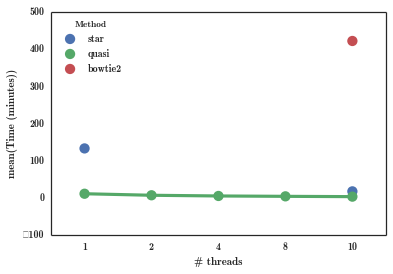

In [90]:
dat = [(n.split('_')[0], float(v), int(n.split('_')[-1])) for n,v in timeDict.iteritems()]
D = pd.DataFrame(dat)
D.columns = ['Method', 'Time (minutes)', '# threads']
sns.pointplot(x="# threads", y="Time (minutes)", hue='Method', data=D.sort("# threads"))

In [11]:
timeDict

{'bowtie2_10': '421.02',
 'quasi_1': '10.37',
 'quasi_10': '2.59',
 'quasi_2': '6.27',
 'quasi_4': '4.39',
 'quasi_8': '3.40',
 'star_1': '132.20',
 'star_10': '16.77'}

###Real Data Venn plot

In [43]:
fileName = "venStats.txt"
cap = []

with open(fileName, 'r') as fileHandle:
    data = fileHandle.readlines()
n1 = int(data[7].strip()[-8:])
n2 = int(data[8].strip()[-8:])
n3 = int(data[9].strip()[-8:])
n4 = int(data[10].strip()[-8:])

cap.append(int(data[14].strip()[-8:]))
n12 = int(data[36].strip().replace("(", '').replace(")", '').split(',')[-1])

cap.append(int(data[38].strip()[-8:]))
n13 = int(data[59].strip().replace("(", '').replace(")", '').split(',')[-1])

cap.append(int(data[61].strip()[-8:]))
n14 = int(data[82].strip().replace("(", '').replace(")", '').split(',')[-1])

cap.append(int(data[84].strip()[-8:]))
n23 = int(data[105].strip().replace("(", '').replace(")", '').split(',')[-1])
    
cap.append(int(data[107].strip()[-8:]))
n24 = int(data[128].strip().replace("(", '').replace(")", '').split(',')[-1])

cap.append(int(data[130].strip()[-8:]))
n34 = int(data[150].strip().replace("(", '').replace(")", '').split(',')[-1])

cap.append(int(data[153].strip()[-8:]))
n123 = int(data[174].strip().replace("(", '').replace(")", '').split(',')[-1])

cap.append(int(data[177].strip()[-8:]))
n124 = int(data[197].strip().replace("(", '').replace(")", '').split(',')[-1])

cap.append(int(data[200].strip()[-8:]))
n134 = int(data[220].strip().replace("(", '').replace(")", '').split(',')[-1])

cap.append(int(data[223].strip()[-8:]))
n234 = int(data[243].strip().replace("(", '').replace(")", '').split(',')[-1])

cap.append(int(data[246].strip()[-8:]))
n1234 = int(data[266].strip().replace("(", '').replace(")", '').split(',')[-1])

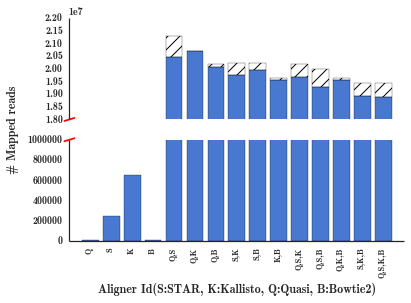

In [203]:
r9 = n1234

r5  =  n123 - r9
r8  =  n234 - r9
r10 =  n124 - r9
r13 =  n134 - r9

r2  =   n13 - (r5 + r9 + r13)
r11 =   n24 - (r8 + r9 + r10)
r12 =   n34 - (r8 + r9 + r13)
r4  =   n23 - (r5 + r8 + r9)
r14 =   n14 - (r9 + r10 + r13)
r6  =   n12 - (r9 + r10 + r5)

r1  = n3 - (r2 + r4 + r5 + r8 + r9 + r12 + r13)
r3  = n1 - (r2 + r5 + r6 + r10 + r9 + r13 + r14)
r7  = n2 - (r4 + r5 + r6 + r8 + r9 + r10 + r11)
r15 = n4 - (r8 + r9 + r10 + r11 + r12 + r13 + r14)


val = [r1, r3, r7, r15, n12, n13, n14, n23, n24, n34, n123, n124, n134, n234, n1234]
errCap = [cap[id-4]-val[id] for id in range(4, 15)]

#axes = plt.gca()
fig,(ax2,ax1) = plt.subplots(2, 1, sharex=True)
plt.ylabel('# Mapped reads', fontsize= 'large' )
plt.xlabel('Aligner Id(S:STAR, K:Kallisto, Q:Quasi, B:Bowtie2)', fontsize= 'large' )
#plt.title('Venn Plot', fontsize= 'large' )

ax1.set_ylim([0, 1000000])
ax2.set_ylim([18000000, 22000000])

ax1.bar(range(15), val, align='center')
#ax2.bar(range(4, 15), errCap, bottom=val[4:15], color='r', align='center')
ax2.bar(range(15), val, align='center')
ax2.bar(range(4, 15), errCap, bottom=val[4:15], color='r', fill=False, hatch='//', align='center')
sns.despine()
ax2.spines['bottom'].set_visible(False)

addBreakClips(ax2, ax1)
plt.xticks(range(15), ['Q', 'S', 'K', 'B', 'Q,S', 'Q,K', 'Q,B', 'S,K', 'S,B', 'K,B', 'Q,S,K', 'Q,S,B', 'Q,K,B', 'S,K,B', 'Q,S,K,B' ], size='small', rotation=90)
ax1.set_xlim([-1, 15])
x0, y0 = ax1.yaxis.label.get_position()
ax1.yaxis.set_label_coords(x0-0.15, y0+0.6)
plt.savefig('./dummy_reads/concordance.pdf',bbox_inches='tight', pad_inches=0)

In [72]:
errCap

[834788,
 1261,
 131282,
 487984,
 287800,
 87213,
 523593,
 711879,
 86757,
 494977,
 526688]

In [221]:
labels = ['Q', 'S', 'K', 'B', 'Q,S', 'Q,K', 'Q,B', 'S,K', 'S,B', 'K,B', 'Q,S,K', 'Q,S,B', 'Q,K,B', 'S,K,B', 'Q,S,K,B' ]

In [233]:
val = [r1, r3, r7, r15, n12, n13, n14, n23, n24, n34, n123, n124, n134, n234, n1234]
ec = [0, 0, 0, 0] + [cap[id-4]-val[id] for id in range(4, 15)]

In [234]:
VD = pd.DataFrame(zip(labels, val, ec))

In [236]:
VD.columns = ['Method', 'Intersection', 'Bound']
VD.set_index('Method', inplace=True)

In [53]:
#sns.PairGrid(VD.T)